In [1]:
import tensorflow as tf
import numpy
import pandas as pd 
from tensorflow.keras import layers 

from numpy import random
# data = pd.read_csv('original.txt', sep='\t')
# types = pd.read_csv('types.txt', sep='\t')

# from numpy import genfromtxt
# my_data = genfromtxt('raw.txt', delimiter='\t',names=True)
# types = genfromtxt('types.txt',delimiter='\t',dtype="unicode")


# raw working 
data = pd.read_csv('raw.txt', sep='\t')
types = pd.read_csv('types.txt', sep='\t')


In [2]:
random.seed(69)
ii = numpy.random.rand(len(data)) < 0.7 

np_data = data.values
np_types = types.values

train = np_data[ii]
test = np_data[~ii]

train_labels = np_types[ii]
test_labels = np_types[~ii]

r_train_labels = train_labels.ravel()
r_test_labels = test_labels.ravel()


In [18]:
# labels = ['brca', 'blca', 'chol', 'coad', 'esca', 'hnsc', 'kich', 'kirc', 'lihc', 'luad', 'prad', 'stad','thca','ucec']
labels = []
for x in r_test_labels:
    if x not in labels: 
        labels.append(x)
labels


[12, 2, 10, 6, 13, 8, 11, 1, 0, 4, 5, 7, 16, 14, 9, 15, 3]

In [3]:
# random forest baseline 

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit( train, r_train_labels, labels)
# scores = cross_validation.cross_val_score(rf, data, t_Types, cv=3, n_jobs=-1)
# print("accuracies     = ",scores)
# print("mean accuracy = %4.2f" % (scores.mean()))
rf


y_pred=rf.predict(test)


('Accuracy: ', 0.9545454545454546)
[[139   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0 140   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2 347   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2  12   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0 125   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  17   2   0   7  41   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0 171   0   0   0   1   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0  31   2   0   0   0   0   0   1   0   0]
 [  0   0   1   0   0   0   0   2 192   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0 119   0   0   0   0   2   0   0]
 [  3   1   8   0   0   0   3   0   0   0 162   0   0   0   1   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0 156   0   0   1   0   0]
 [  0   0   0   0   8   1   2   0   0   0   2   0 140   0   0   2   0]
 [  0   0   1   0   0   0   0   0   2   0 

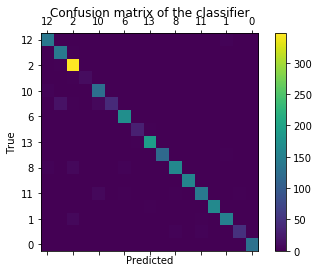

Predicted,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
True,,,,,,,,,,,,,,,,,,
0,139,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,142
1,0,140,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142
2,0,2,347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,349
3,0,0,2,12,0,0,0,0,0,0,0,0,0,0,0,0,0,14
4,3,0,0,0,125,0,0,0,0,0,0,0,0,0,0,0,0,128
5,0,17,2,0,7,41,0,0,0,0,0,0,1,0,0,0,0,68
6,0,0,0,0,0,0,171,0,0,0,1,1,0,0,0,0,0,173
7,0,0,0,0,0,0,0,31,2,0,0,0,0,0,1,0,0,34
8,0,0,1,0,0,0,0,2,192,0,0,0,0,0,0,0,1,196


In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Model Accuracy, how often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(r_test_labels, y_pred))

yhat = confusion_matrix(r_test_labels, y_pred,)
print(yhat)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(yhat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

y_true = pd.Series(r_test_labels)
y_pred = pd.Series(y_pred)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [28]:
# ##########################################
# ##  data processing step 
# ##########################################

# # split into train and test!!  
# ii = numpy.random.rand(len(data)) < 0.7 
# train = data[ii]
# test = data[~ii]

# train_labels = train['type']
# test_labels = test['type']

# train_feat = train.drop(['type'],axis=1)
# test_feat = test.drop(['type'],axis=1)

# # # convert from pandas data frame to numpy array 
# np_train_feat = train_feat.values
# np_train_labels = train_labels.values 

# np_test_feat = test_feat.values 
# np_test_labels = test_labels.values

# # turn column vector of types to array
# np_train_labels = np_train_labels.transpose()
# np_test_labels = np_test_labels.transpose()

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# np_train_labels_encoded = encoder.fit_transform(np_train_labels)
# np_test_labels_encoded = encoder.fit_transform(np_test_labels)




In [47]:
model = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))

# softmax with 17 output units; one for each class label 
model.add(layers.Dense(17, activation='softmax'))

In [60]:
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
# softmax with 17 output units; one for each class label 
model.add(layers.Dense(17, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# setup model training 
# model.compile(optimizer=tf.train.AdamOptimizer(0.01),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# Configure a model for categorical classification.
# model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
#               loss=tf.keras.losses.categorical_crossentropy,
#               metrics=[tf.keras.metrics.categorical_accuracy])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

('Accuracy: ', 1.0)


In [65]:

# train! 
# epochs is how many times you go through training set
# batch_size is the number of samples to propogate at once

model.fit(data, types, epochs=10, batch_size=56)


Epoch 1/10
7950/7950 [==============================] - 1s 172us/step - loss: 14.9543 - acc: 0.0722
Epoch 2/10
7950/7950 [==============================] - 1s 157us/step - loss: 14.9543 - acc: 0.0722
Epoch 3/10
7950/7950 [==============================] - 1s 159us/step - loss: 14.9543 - acc: 0.0722
Epoch 4/10
7950/7950 [==============================] - 1s 160us/step - loss: 14.9543 - acc: 0.0722
Epoch 5/10
7950/7950 [==============================] - 1s 160us/step - loss: 14.9543 - acc: 0.0722
Epoch 6/10
7950/7950 [==============================] - 1s 172us/step - loss: 14.9543 - acc: 0.0722
Epoch 7/10
7950/7950 [==============================] - 1s 161us/step - loss: 14.9543 - acc: 0.0722
Epoch 8/10
7950/7950 [==============================] - 1s 159us/step - loss: 14.9543 - acc: 0.0722
Epoch 9/10
7950/7950 [==============================] - 1s 171us/step - loss: 14.9543 - acc: 0.0722
Epoch 10/10
7950/7950 [==============================] - 1s 167us/step - loss: 14.9543 - acc: 0.0722

In [56]:
ynew = model.predict_classes(data)

In [57]:
for i in range(len(types)):
    print("X=%s, Predicted=%s" % (types[i], ynew[i]))

X=[16], Predicted=2
X=[12], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[10], Predicted=2
X=[14], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[10], Predicted=2
X=[4], Predicted=2
X=[13], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[16], Predicted=2
X=[10], Predicted=2
X=[5], Predicted=2
X=[8], Predicted=2
X=[9], Predicted=2
X=[3], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[16], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[8], Predicted=2
X=[13], Predicted=2
X=[5], Predicted=2
X=[4], Predicted=2
X=[8], Predicted=2
X=[8], Predicted=2
X=[8], Predicted=2
X=[6], Predicted=2
X=[16], Predicted=2
X=[8], Predicted=2
X=[13], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[12], Predicted=2
X=[16], Predicted=2
X=[12], Predicted=2
X=[4], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[16]

X=[12], Predicted=2
X=[14], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=2
X=[8], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[16], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[16], Predicted=2
X=[12], Predicted=2
X=[6], Predicted=2
X=[10], Predicted=2
X=[9], Predicted=2
X=[10], Predicted=2
X=[8], Predicted=2
X=[0], Predicted=2
X=[13], Predicted=2
X=[1], Predicted=2
X=[9], Predicted=2
X=[16], Predicted=2
X=[4], Predicted=2
X=[9], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[16], Predicted=2
X=[10], Predicted=2
X=[14], Predicted=2
X=[0], Predicted=2
X=[8], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[11], Predicted=2
X=[0], Predicted=2
X=[1], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[16], Predicted=2
X=[4], Predicted=2
X=[10], Predicted=2
X=[6], 

X=[13], Predicted=2
X=[14], Predicted=2
X=[14], Predicted=2
X=[1], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[13], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[14], Predicted=2
X=[14], Predicted=2
X=[5], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[1], Predicted=2
X=[6], Predicted=2
X=[9], Predicted=2
X=[13], Predicted=2
X=[13], Predicted=2
X=[14], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[14], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=2
X=[11], Predicted=2
X=[12], Predicted=2
X=[12], Predicted=2
X=[0], Predicted=2
X=[4], Predicted=2
X=[1], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[14], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[6], Predicted=2
X=[10], Predicted=2
X=[0], Pre

X=[8], Predicted=2
X=[1], Predicted=2
X=[10], Predicted=2
X=[8], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=2
X=[13], Predicted=2
X=[8], Predicted=2
X=[14], Predicted=2
X=[15], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[13], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[12], Predicted=2
X=[13], Predicted=2
X=[13], Predicted=2
X=[14], Predicted=2
X=[13], Predicted=2
X=[0], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[13], Predicted=2
X=[4], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[14], Predicted=2
X=[9], Predicted=2
X=[6], Predicted=2
X=[4], Predicted=2
X=[2], Predicted=2
X=[11], Predicted=2
X=[6], Predicted=2
X=[11], Predicted=2
X=[11], Predicted=2
X=[12], Predicted=2
X=[11], Predicted=2
X=[8], Predicted=2
X=[5], Predicted=2
X=[14], Predicted=2
X=[13], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[4

X=[11], Predicted=2
X=[1], Predicted=2
X=[13], Predicted=2
X=[14], Predicted=2
X=[16], Predicted=2
X=[0], Predicted=2
X=[0], Predicted=2
X=[11], Predicted=2
X=[13], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[13], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[15], Predicted=2
X=[10], Predicted=2
X=[4], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[5], Predicted=2
X=[10], Predicted=2
X=[9], Predicted=2
X=[0], Predicted=2
X=[11], Predicted=2
X=[15], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[16], Predicted=2
X=[1], Predicted=2
X=[16], Predicted=2
X=[9], Predicted=2
X=[11], Predicted=2
X=[13], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[13], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[1], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[11], Predicted=2
X=[1], Predicted=2
X=[15], Predicted=2
X=

X=[14], Predicted=2
X=[14], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[9], Predicted=2
X=[6], Predicted=2
X=[8], Predicted=2
X=[6], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[4], Predicted=2
X=[11], Predicted=2
X=[5], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[6], Predicted=2
X=[16], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[10], Predicted=2
X=[6], Predicted=2
X=[14], Predicted=2
X=[6], Predicted=2
X=[10], Predicted=2
X=[8], Predicted=2
X=[6], Predicted=2
X=[8], Predicted=2
X=[6], Predicted=2
X=[8], Predicted=2
X=[9], Predicted=2
X=[6], Predicted=2
X=[6], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[13], Predicted=2
X=[7], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[4], Predict

X=[2], Predicted=2
X=[10], Predicted=2
X=[11], Predicted=2
X=[12], Predicted=2
X=[15], Predicted=2
X=[1], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[12], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[12], Predicted=2
X=[12], Predicted=2
X=[1], Predicted=2
X=[8], Predicted=2
X=[13], Predicted=2
X=[7], Predicted=2
X=[1], Predicted=2
X=[6], Predicted=2
X=[3], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[0], Predicted=2
X=[14], Predicted=2
X=[15], Predicted=2
X=[1], Predicted=2
X=[6], Predicted=2
X=[1], Predicted=2
X=[13], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[1], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[12], Predicted=2
X=[10], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[8], Predicted=2
X=[16], Predicted=2
X=[5], Predicted=2
X=[11], Predicted=2
X=[15], Predicted=2
X=[13], Predicted=2
X=[13], Predicted=2
X=

X=[13], Predicted=2
X=[1], Predicted=2
X=[0], Predicted=2
X=[14], Predicted=2
X=[16], Predicted=2
X=[8], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=2
X=[8], Predicted=2
X=[10], Predicted=2
X=[13], Predicted=2
X=[1], Predicted=2
X=[8], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[4], Predicted=2
X=[16], Predicted=2
X=[9], Predicted=2
X=[6], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[7], Predicted=2
X=[8], Predicted=2
X=[8], Predicted=2
X=[10], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[5], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[8], Predicted=2
X=[10], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[7], Predicted=2
X=[11], Predicted=2
X=[12], Predicted=2
X=[6], Predicted=2
X=[0], Predicted=2
X=[10], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[6], Predi

X=[4], Predicted=2
X=[0], Predicted=2
X=[15], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[11], Predicted=2
X=[16], Predicted=2
X=[14], Predicted=2
X=[6], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[8], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[9], Predicted=2
X=[13], Predicted=2
X=[4], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[8], Predicted=2
X=[15], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[11], Predicted=2
X=[16], Predicted=2
X=[14], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[10], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[16], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[0], Predicted=2
X=[10], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[9], Predicted=2
X=[13], Predicted=2
X=[13

X=[16], Predicted=2
X=[4], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[0], Predicted=2
X=[0], Predicted=2
X=[6], Predicted=2
X=[10], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[2], Predicted=2
X=[13], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[7], Predicted=2
X=[16], Predicted=2
X=[10], Predicted=2
X=[1], Predicted=2
X=[1], Predicted=2
X=[8], Predicted=2
X=[4], Predicted=2
X=[5], Predicted=2
X=[7], Predicted=2
X=[6], Predicted=2
X=[8], Predicted=2
X=[15], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[1], Predicted=2
X=[16], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[4], Predicted=2
X=[14], Predicted=2
X=[10], Predicted=2
X=[10], Predicted=2
X=[6], Predicted=2
X=[4], Predicted=2
X=[10], Predicted=2
X=[14], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[

X=[10], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[13], Predicted=2
X=[6], Predicted=2
X=[4], Predicted=2
X=[10], Predicted=2
X=[6], Predicted=2
X=[9], Predicted=2
X=[16], Predicted=2
X=[6], Predicted=2
X=[0], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[14], Predicted=2
X=[6], Predicted=2
X=[14], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[4], Predicted=2
X=[10], Predicted=2
X=[15], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[0], Predicted=2
X=[10], Predicted=2
X=[5], Predicted=2
X=[13], Predicted=2
X=[4], Predicted=2
X=[14], Predicted=2
X=[10], Predicted=2
X=[13], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[4], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[6], Predicted=2
X=[8], Predicted=2
X=[11], Predicted=2
X=[7], Predicted=2
X=[9], Predicted=2
X=[9], Predicted=2
X=[1], Pre

X=[13], Predicted=2
X=[10], Predicted=2
X=[11], Predicted=2
X=[4], Predicted=2
X=[14], Predicted=2
X=[2], Predicted=2
X=[16], Predicted=2
X=[4], Predicted=2
X=[0], Predicted=2
X=[6], Predicted=2
X=[6], Predicted=2
X=[1], Predicted=2
X=[11], Predicted=2
X=[4], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[2], Predicted=2
X=[16], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[9], Predicted=2
X=[2], Predicted=2
X=[9], Predicted=2
X=[5], Predicted=2
X=[13], Predicted=2
X=[8], Predicted=2
X=[0], Predicted=2
X=[2], Predicted=2
X=[1], Predicted=2
X=[4], Predicted=2
X=[14], Predicted=2
X=[8], Predicted=2
X=[2], Predicted=2
X=[10], Predicted=2
X=[15], Predicted=2
X=[13], Predicted=2
X=[13], Predicted=2
X=[2], Predicted=2
X=[11], Predicted=2
X=[14], Predicted=2
X=[10], Predicted=2
X=[2], Predicted=2
X=[9], Predicted=2
X=[4], Predicted=2
X=[14], Predicted=2
X=[10], Predicted=2
X=[4], Predicted=2
X=[5], Predicted=2
X=[4], Pre

X=[12], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[14], Predicted=2
X=[12], Predicted=2
X=[11], Predicted=2
X=[2], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[14], Predicted=2
X=[11], Predicted=2
X=[10], Predicted=2
X=[4], Predicted=2
X=[2], Predicted=2
X=[12], Predicted=2
X=[6], Predicted=2
X=[13], Predicted=2
X=[4], Predicted=2
X=[4], Predicted=2
X=[3], Predicted=2
X=[8], Predicted=2
X=[12], Predicted=2
X=[8], Predicted=2
X=[1], Predicted=2
X=[10], Predicted=2
X=[12], Predicted=2
X=[16], Predicted=2
X=[2], Predicted=2
X=[9], Predicted=2
X=[6], Predicted=2
X=[2], Predicted=2
X=[2], Predicted=2
X=[5], Predicted=2
X=[16], Predicted=2
X=[13], Predicted=2
X=[6], Predicted=2
X=[1], Predicted=2
X=[12], Predicted=2
X=[1], Predicted=2
X=[1], Predicted=2
X=[8], Predicted=2
X=[0], Predicted=2
X=[11], Predicted=2
X=[0], Predicted=2
X=[7], Predicted=2
X=[13], Predicted=2
X=[1], Pred

In [31]:
types

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [17],
       [17],
       [17]])